In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ASBO.csv")

In [ ]:
data.head(10)

,Year of Breach,Age group breach 2,Court_breach,Sex,ASBOs_breached
0,2002,18,"Abingdon, Didcot and Wantage Magistrates' Court",1,1
1,2004,18,"Abingdon, Didcot and Wantage Magistrates' Court",1,1
2,2005,18,"Abingdon, Didcot and Wantage Magistrates' Court",2,1
3,2008,18,"Abingdon, Didcot and Wantage Magistrates' Court",2,1
4,2009,18,"Abingdon, Didcot and Wantage Magistrates' Court",1,2
5,2004,'10-17,Acton Youth Court,1,1
6,2005,'10-17,Acton Youth Court,1,2
7,2006,'10-17,Acton Youth Court,1,1
8,2007,'10-17,Acton Youth Court,1,1
9,2009,'10-17,Acton Youth Court,1,1


In [ ]:
data["ASBOs_breached"].describe()

,ASBOs_breached
count,5547.000000
mean,2.550207
std,3.091896
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,57.000000


In [ ]:
data['Sex'] = data['Sex'].map({1: 'Male', 2: 'Female', 9: 'Unknown'})

/tmp/ipython-input-2133905847.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Sex', palette='Set2')


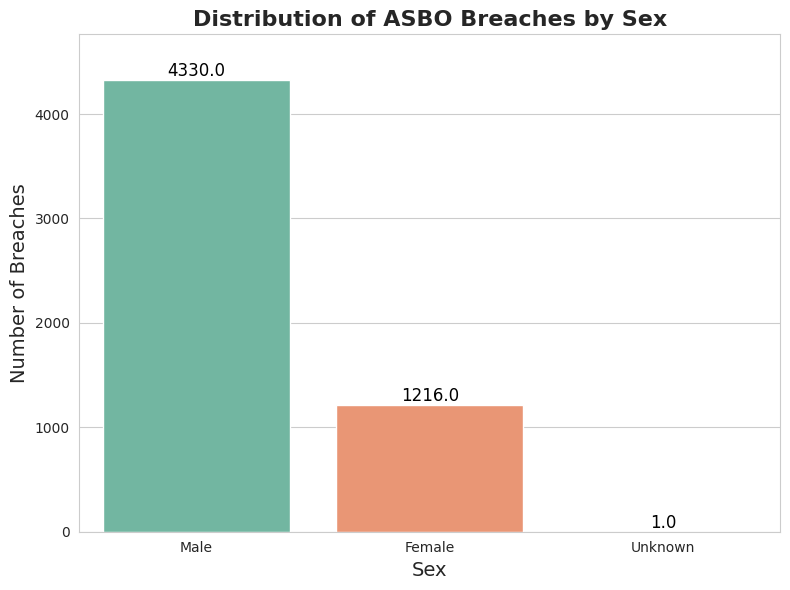

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Use a more distinct palette and add counts on top of bars
ax = sns.countplot(data=data, x='Sex', palette='Set2')

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black')

plt.title('Distribution of ASBO Breaches by Sex', fontsize=16, weight='bold')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Number of Breaches', fontsize=14)
plt.ylim(0, data['Sex'].value_counts().max() * 1.1)  # Add some headroom for labels
plt.tight_layout()
plt.show()


In [ ]:
data.rename(columns={'Age group breach 2': 'AgeGroup'}, inplace=True)

In [ ]:
def midpoint(age_str):
    if isinstance(age_str, str):
        # Remove any stray quotes
        age_str = age_str.replace("'", "").strip()

        # Handle range like 10-17
        if '-' in age_str:
            parts = age_str.split('-')
            try:
                return (int(parts[0]) + int(parts[1])) / 2
            except ValueError:
                return None
        # Handle single age like 18
        elif age_str.isdigit():
            return int(age_str)
    return None

# Apply to your data
data['AgeGroupMid'] = data['AgeGroup'].apply(midpoint)

# Now get min, max, mean
print("Min:", data['AgeGroupMid'].min())
print("Max:", data['AgeGroupMid'].max())
print("Mean:", data['AgeGroupMid'].mean())


Min: 13.5
Max: 18.0
Mean: 16.33775013520822


/tmp/ipython-input-175207341.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


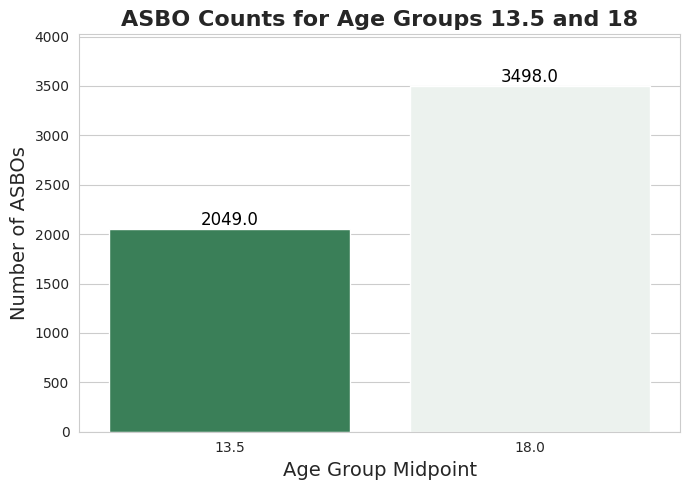

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for the two age groups
age_subset = data[data['AgeGroupMid'].isin([13.5, 18])]

# Calculate counts in sorted order
counts = age_subset['AgeGroupMid'].value_counts().sort_index()

plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")

# Use a continuous green palette with more contrast
palette = sns.light_palette("seagreen", n_colors=2, reverse=True)

ax = sns.barplot(
    x=counts.index.astype(str),
    y=counts.values,
    palette=palette
)

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Age Group Midpoint', fontsize=14)
plt.ylabel('Number of ASBOs', fontsize=14)
plt.title('ASBO Counts for Age Groups 13.5 and 18', fontsize=16, weight='bold')
plt.ylim(0, counts.max() * 1.15)  # Add some space above bars for labels
plt.tight_layout()
plt.show()


/tmp/ipython-input-3859263484.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Year of Breach', palette='viridis')


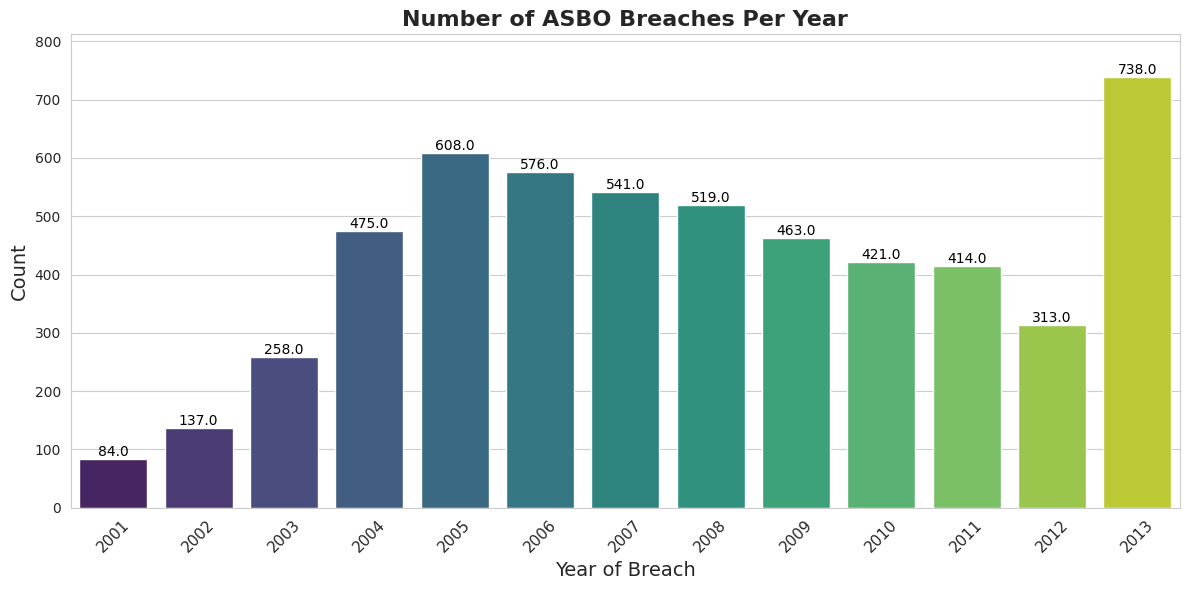

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

ax = sns.countplot(data=data, x='Year of Breach', palette='viridis')

# Rotate x-ticks for readability
plt.xticks(rotation=45, fontsize=11)

# Add count labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Number of ASBO Breaches Per Year', fontsize=16, weight='bold')
plt.xlabel('Year of Breach', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim(0, data['Year of Breach'].value_counts().max() * 1.1)  # Add headroom for labels
plt.tight_layout()
plt.show()


/tmp/ipython-input-834473553.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=data, x='Sex', y='AgeGroupMid', ci=None, palette='muted')
/tmp/ipython-input-834473553.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data, x='Sex', y='AgeGroupMid', ci=None, palette='muted')


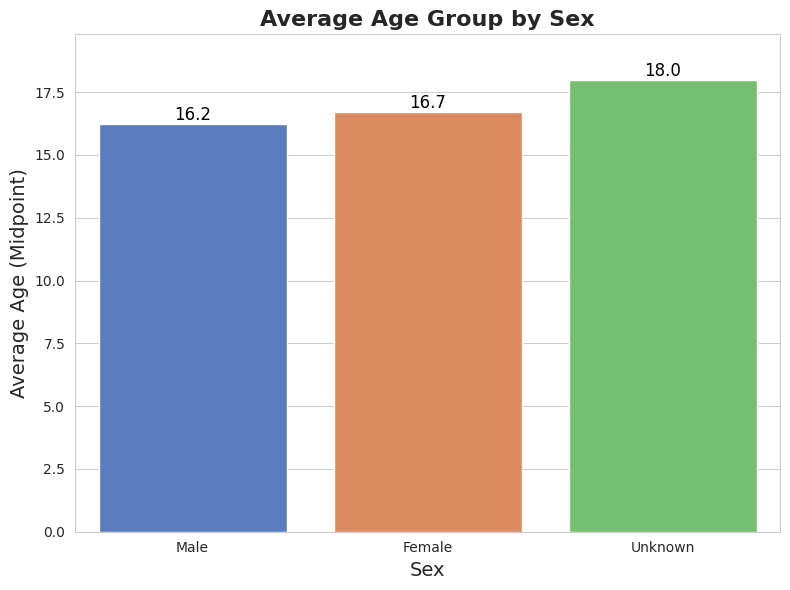

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

ax = sns.barplot(data=data, x='Sex', y='AgeGroupMid', ci=None, palette='muted')

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black')

plt.title('Average Age Group by Sex', fontsize=16, weight='bold')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Average Age (Midpoint)', fontsize=14)
plt.ylim(0, data['AgeGroupMid'].max() * 1.1)  # Add some space above bars for labels
plt.tight_layout()
plt.show()


Root Mean Squared Error: 3.020
R^2 Score: 0.289


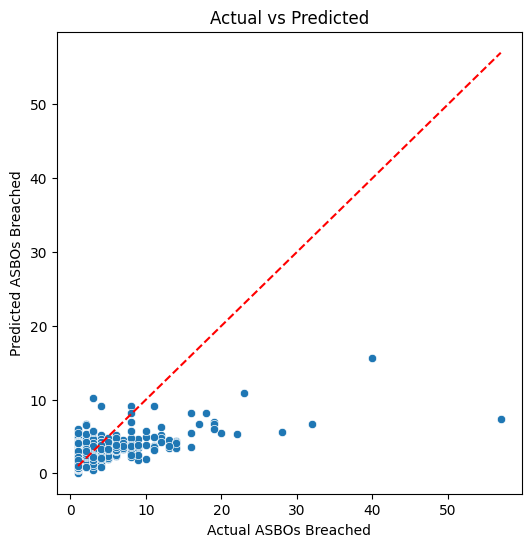

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------
# 1. Load your dataset
# -------------------------
# Assuming your DataFrame is named `data`

# -------------------------
# 2. Data Preprocessing
# -------------------------

# Drop rows with missing target
data = data.dropna(subset=['ASBOs_breached'])

# Convert 'Sex' and 'Court_breach' to categorical using LabelEncoder
label_cols = ['Sex', 'Court_breach']

for col in label_cols:
    data[col] = data[col].astype(str)
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Convert AgeGroup to midpoint (if not already done)
def age_midpoint(age_str):
    if pd.isnull(age_str):
        return np.nan
    age_str = age_str.replace("'", "")
    if '-' in age_str:
        parts = age_str.split('-')
        return (int(parts[0]) + int(parts[1])) / 2
    else:
        try:
            return float(age_str)
        except:
            return np.nan

data['AgeGroupMid'] = data['AgeGroup'].apply(age_midpoint)

# Drop missing AgeGroupMid
data = data.dropna(subset=['AgeGroupMid'])

# -------------------------
# 3. Define features and target
# -------------------------
features = ['Year of Breach', 'Sex', 'Court_breach', 'AgeGroupMid']
target = 'ASBOs_breached'

X = data[features]
y = data[target]

# -------------------------
# 4. Train-test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# -------------------------
# 5. Train XGBoost Regressor
# -------------------------
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

# -------------------------
# 6. Evaluate
# -------------------------
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Optional: Plot actual vs predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual ASBOs Breached")
plt.ylabel("Predicted ASBOs Breached")
plt.title("Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()


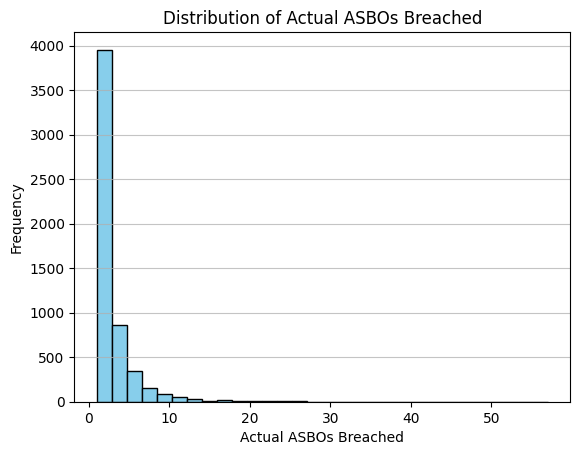

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data['ASBOs_breached'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Actual ASBOs Breached")
plt.ylabel("Frequency")
plt.title("Distribution of Actual ASBOs Breached")
plt.grid(axis='y', alpha=0.75)
plt.show()



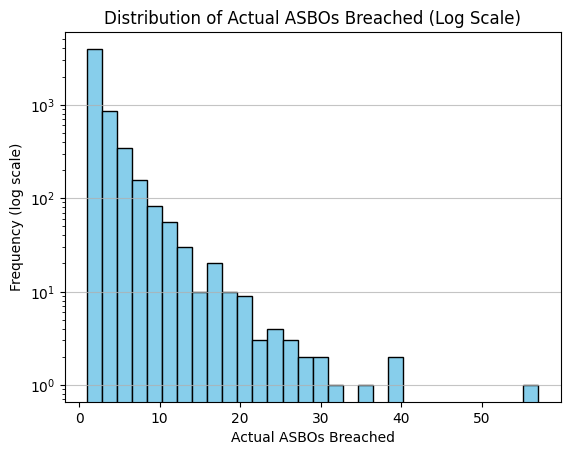

In [ ]:
plt.hist(data['ASBOs_breached'], bins=30, color='skyblue', edgecolor='black', log=True)
plt.xlabel("Actual ASBOs Breached")
plt.ylabel("Frequency (log scale)")
plt.title("Distribution of Actual ASBOs Breached (Log Scale)")
plt.grid(axis='y', alpha=0.75)
plt.show()


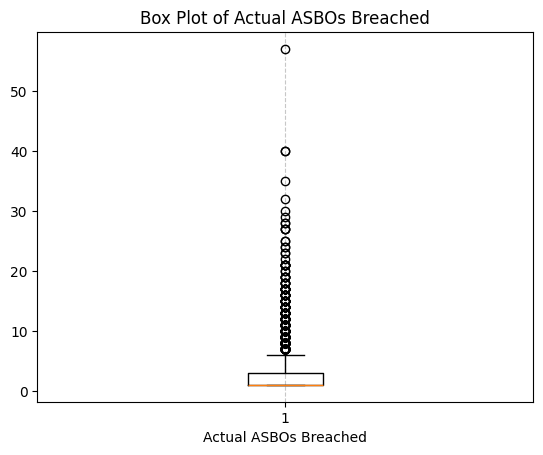

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(data['ASBOs_breached'])
plt.xlabel("Actual ASBOs Breached")
plt.title("Box Plot of Actual ASBOs Breached")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


#Log Transformation

Root Mean Squared Error: 3.297
R^2 Score: 0.153


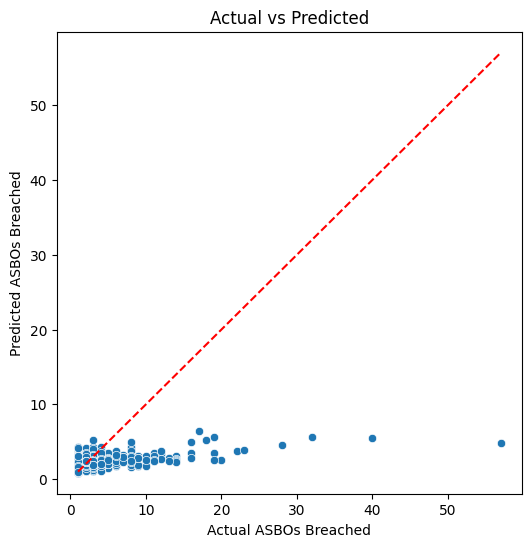

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score



# -------------------------
# 2. Data Preprocessing
# -------------------------

# Drop rows with missing target
data = data.dropna(subset=['ASBOs_breached'])

# Convert 'Sex' and 'Court_breach' to categorical using LabelEncoder
label_cols = ['Sex', 'Court_breach']

for col in label_cols:
    data[col] = data[col].astype(str)
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Convert AgeGroup to midpoint (if not already done)
def age_midpoint(age_str):
    if pd.isnull(age_str):
        return np.nan
    age_str = age_str.replace("'", "")
    if '-' in age_str:
        parts = age_str.split('-')
        return (int(parts[0]) + int(parts[1])) / 2
    else:
        try:
            return float(age_str)
        except:
            return np.nan

data['AgeGroupMid'] = data['AgeGroup'].apply(age_midpoint)

# Drop missing AgeGroupMid
data = data.dropna(subset=['AgeGroupMid'])

# -------------------------
# 3. Define features and log target
# -------------------------
features = ['Year of Breach', 'Sex', 'Court_breach', 'AgeGroupMid']
target = 'ASBOs_breached'

X = data[features]
y = np.log1p(data[target])  # log(1 + x) to handle zeros

# -------------------------
# 4. Train-test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# -------------------------
# 5. Train XGBoost Regressor
# -------------------------
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

# -------------------------
# 6. Evaluate
# -------------------------
y_pred_log = model.predict(X_test)
y_test_orig = np.expm1(y_test)       # Reverse log1p
y_pred_orig = np.expm1(y_pred_log)   # Reverse log1p

rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
r2 = r2_score(y_test_orig, y_pred_orig)

print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Optional: Plot actual vs predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_orig, y=y_pred_orig)
plt.xlabel("Actual ASBOs Breached")
plt.ylabel("Predicted ASBOs Breached")
plt.title("Actual vs Predicted")
plt.plot([y_test_orig.min(), y_test_orig.max()],
         [y_test_orig.min(), y_test_orig.max()],
         color='red', linestyle='--')
plt.show()


#Square Root Transformation

Root Mean Squared Error: 3.161
R^2 Score: 0.221


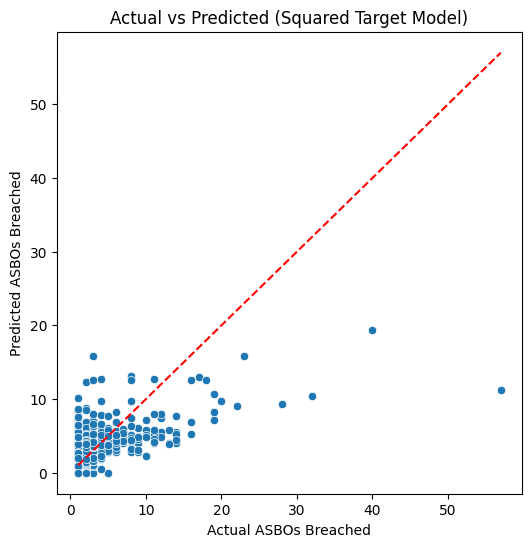

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


# -------------------------
# 2. Preprocessing
# -------------------------
# Drop rows with missing target
data = data.dropna(subset=['ASBOs_breached'])

# Encode categorical variables
label_cols = ['Sex', 'Court_breach']
for col in label_cols:
    data[col] = data[col].astype(str)
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Convert AgeGroup to midpoint
def age_midpoint(age_str):
    if pd.isnull(age_str):
        return np.nan
    age_str = age_str.replace("'", "")
    if '-' in age_str:
        parts = age_str.split('-')
        return (int(parts[0]) + int(parts[1])) / 2
    else:
        try:
            return float(age_str)
        except:
            return np.nan

data['AgeGroupMid'] = data['AgeGroup'].apply(age_midpoint)
data = data.dropna(subset=['AgeGroupMid'])

# -------------------------
# 3. Features and Squared Target
# -------------------------
features = ['Year of Breach', 'Sex', 'Court_breach', 'AgeGroupMid']
target = 'ASBOs_breached'

X = data[features]
y = data[target] ** 2  # Square transformation

# -------------------------
# 4. Train-test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# 5. Model Training
# -------------------------
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

# -------------------------
# 6. Prediction & Inverse Transform
# -------------------------
y_pred_squared = model.predict(X_test)
y_pred_squared = np.clip(y_pred_squared, a_min=0, a_max=None)  # Ensure no negative values
y_pred = np.sqrt(y_pred_squared)  # Back to original scale

y_test_original = np.sqrt(y_test)  # Reverse transform of test labels

# -------------------------
# 7. Evaluation
# -------------------------
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
r2 = r2_score(y_test_original, y_pred)

print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")

# -------------------------
# 8. Visualization
# -------------------------
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_original, y=y_pred)
plt.xlabel("Actual ASBOs Breached")
plt.ylabel("Predicted ASBOs Breached")
plt.title("Actual vs Predicted (Squared Target Model)")
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         color='red', linestyle='--')
plt.show()


#Filtering Outliers

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Use your existing DataFrame named `data`
df = data.copy()

# Calculate IQR for the target column 'ASBOs_breached'
Q1 = df['ASBOs_breached'].quantile(0.25)
Q3 = df['ASBOs_breached'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['ASBOs_breached'] >= lower_bound) & (df['ASBOs_breached'] <= upper_bound)]

print(f"Filtered out {len(df) - len(df_filtered)} rows as outliers.")

# Prepare features and target
X = df_filtered.drop(columns=['ASBOs_breached'])
y = df_filtered['ASBOs_breached']

# One-hot encode categorical columns (adjust if needed)
X = pd.get_dummies(X, drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the model
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate with Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.4f}")


Filtered out 391 rows as outliers.
Mean Squared Error: 1.5286
R² score: 0.1467


#Winsorizing Data

In [ ]:
from scipy.stats.mstats import winsorize

# Winsorize the 'ASBOs_breached' column
df['ASBOs_breached_winsor'] = winsorize(df['ASBOs_breached'], limits=[0.01, 0.01])


In [ ]:
# Prepare features and target
X = df.drop(columns=['ASBOs_breached_winsor','ASBOs_breached'])
y = df['ASBOs_breached_winsor']

# One-hot encode categorical columns (adjust if needed)
X = pd.get_dummies(X, drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:

# Initialize and train the model
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate with Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.4f}")


Mean Squared Error: 4.8781
R² score: 0.3359


#Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 3. Define a deeper model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# 4. Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 5. Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.1, verbose=1)

# 6. Evaluate on test data
y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² score: {r2:.4f}")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 126.2165 - mae: 7.2970 - val_loss: 8.3755 - val_mae: 2.0120
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2810 - mae: 1.8382 - val_loss: 8.3903 - val_mae: 1.6727
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3836 - mae: 2.0445 - val_loss: 17.7850 - val_mae: 3.0976
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10.1163 - mae: 2.2488 - val_loss: 8.1934 - val_mae: 1.8740
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.5903 - mae: 2.2253 - val_loss: 29.0228 - val_mae: 4.5666
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.4090 - mae: 2.1446 - val_loss: 16.8886 - val_mae: 3.7923
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.1404 - mae: 2.3973 - val_loss: 9.1141 - val_mae: 1.5602
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.1195 - mae: 2.1188 - val_loss: 8.7323 - val_mae: 2.2361
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df_filtered.drop(columns=['ASBOs_breached'])  # adjust if your target column is different
y = df_filtered['ASBOs_breached']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode categorical features if any
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns (in case dummies create mismatched columns)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the neural network model
class ASBORegressor(nn.Module):
    def __init__(self, input_dim):
        super(ASBORegressor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

# Initialize model
input_dim = X_train_scaled.shape[1]
model = ASBORegressor(input_dim)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()
    true_vals = y_test_tensor.numpy()

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(true_vals, predictions)
r2 = r2_score(true_vals, predictions)

print(f"\nMean Squared Error: {mse:.4f}")
print(f"R² score: {r2:.4f}")


Epoch 10/100, Loss: 1.4655
Epoch 20/100, Loss: 1.4487
Epoch 30/100, Loss: 1.4430
Epoch 40/100, Loss: 1.4424
Epoch 50/100, Loss: 1.4365
Epoch 60/100, Loss: 1.4383
Epoch 70/100, Loss: 1.4291
Epoch 80/100, Loss: 1.4259
Epoch 90/100, Loss: 1.4279
Epoch 100/100, Loss: 1.4252

Mean Squared Error: 1.5607
R² score: 0.1288


#Feature Engineering

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ASBO.csv")
data['Sex'] = data['Sex'].map({1: 'Male', 2: 'Female', 9: 'Unknown'})
data.rename(columns={'Age group breach 2': 'AgeGroup'}, inplace=True)
def midpoint(age_str):
    if isinstance(age_str, str):
        # Remove any stray quotes
        age_str = age_str.replace("'", "").strip()

        # Handle range like 10-17
        if '-' in age_str:
            parts = age_str.split('-')
            try:
                return (int(parts[0]) + int(parts[1])) / 2
            except ValueError:
                return None
        # Handle single age like 18
        elif age_str.isdigit():
            return int(age_str)
    return None

# Apply to your data
data['AgeGroupMid'] = data['AgeGroup'].apply(midpoint)


In [ ]:
def extract_court_type(court_name):
    court_name = str(court_name).lower()
    if "youth court" in court_name:
        return "Youth"
    elif "magistrates'" in court_name:
        return "Magistrates"
    elif "crown court" in court_name:
        return "Crown"
    else:
        return "Other"

data["CourtType"] = data["Court_breach"].apply(extract_court_type)
print(data["CourtType"].value_counts())

CourtType
Magistrates    3151
Youth          1679
Crown           606
Other           111
Name: count, dtype: int64


In [ ]:
import re

def extract_city(court_str):
    # Remove known court types and trailing spaces
    city = re.sub(r"\s*(Magistrates' Court|Youth Court|Crown Court)$", "", court_str)
    return city.strip().lower()  # lowercase for consistency, remove spaces

data['City'] = data['Court_breach'].apply(extract_city)


In [ ]:
city_to_region = {
    'abingdon, didcot and wantage': 'South East',
    'acton': 'London',
    'alnwick': 'North East',
    'ashby-de-la-zouch': 'East Midlands',
    'aylesbury': 'South East',
    'banbury': 'South East',
    'barking and dagenham': 'London',
    'barking': 'London',
    'barnet': 'London',
    'barnsley district': 'Yorkshire and the Humber',
    'basildon': 'East of England',
    'bath and wansdyke': 'South West',
    'batley and dewsbury': 'Yorkshire and the Humber',
    'bedford and mid bedfordshire': 'East of England',
    'bedford': 'East of England',
    'berkshire': 'South East',
    'berwick-upon-tweed': 'North East',
    'beverley and the wolds': 'Yorkshire and the Humber',
    'bexley': 'London',
    'birmingham': 'West Midlands',
    'blackburn darwen and ribble valley': 'North West',
    'blackfriars': 'London',
    'blackpool': 'North West',
    'bolton': 'North West',
    'boston': 'East Midlands',
    'bourne and stamford': 'East Midlands',
    'bournemouth': 'South West',
    'bow street': 'Wales',
    'bradford and keighley': 'Yorkshire and the Humber',
    'bradford': 'Yorkshire and the Humber',
    'brecon': 'Wales',
    'brent': 'London',
    'bridlington': 'Yorkshire and the Humber',
    'bristol': 'South West',
    'bromley': 'London',
    'bromsgrove and redditch': 'West Midlands',
    'buckinghamshire': 'South East',
    'burnley': 'North West',
    'burnley pendle and rossendale': 'North West',
    'bury and rochdale': 'North West',
    'bury': 'North West',
    'calderdale': 'Yorkshire and the Humber',
    'cambridge': 'East of England',
    'camden and islington': 'London',
    'cannock and seisdon': 'West Midlands',
    'canterbury': 'South East',
    'cardiff and the vale of glamorgan': 'Wales',
    'cardiff': 'Wales',
    'carlisle and district': 'North West',
    'carlisle': 'North West',
    'carmarthenshire': 'Wales',
    'central and south west staffordshire': 'West Midlands',
    'central buckinghamshire': 'South East',
    'central criminal': 'London',
    'central devon': 'South West',
    'central hertfordshire': 'East of England',
    'central hertforshire': 'East of England',
    'central london': 'London',
    'central norfolk': 'East of England',
    'channel': 'South East',
    'chelmsford': 'East of England',
    'chester': 'North West',
    'chester ellesmere port and neston': 'North West',
    'chester-le-street': 'North East',
    'chichester': 'South East',
    'chorley': 'North West',
    'city of london': 'London',
    'city of salford': 'North West',
    'city of sunderland': 'North East',
    'claro': 'Yorkshire and the Humber',
    'cleddau': 'Wales',
    'colchester': 'East of England',
    'conwy': 'Wales',
    'corby': 'East Midlands',
    'cornwall': 'South West',
    'coventry': 'West Midlands',
    'coventry district': 'West Midlands',
    'croydon': 'London',
    'cynon valley': 'Wales',
    'denbighshire': 'Wales',
    'derby & south derbyshire': 'East Midlands',
    'derby': 'East Midlands',
    'doncaster': 'Yorkshire and the Humber',
    'dudley & halesowen': 'West Midlands',
    'dudley and halesowen': 'West Midlands',
    'dudley': 'West Midlands',
    'durham': 'North East',
    'ealing': 'London',
    'east berkshire': 'South East',
    'east cambridgeshire': 'East of England',
    'east cornwall': 'South West',
    'east derbyshire': 'East Midlands',
    'east dorset': 'South West',
    'east hertfordshire': 'East of England',
    'east kent': 'South East',
    'east lancashire': 'North West',
    'east lincolnshire': 'East Midlands',
    'east london': 'London',
    'east yorkshire': 'Yorkshire and the Humber',
    'eden': 'North West',
    'elloes': 'East Midlands',
    'enfield': 'London',
    'epworth and goole': 'Yorkshire and the Humber',
    'exeter': 'South West',
    'fenland': 'East of England',
    'flintshire': 'Wales',
    'forest of dean': 'South West',
    'furness and district': 'North West',
    'fylde coast': 'North West',
    'gateshead district': 'North East',
    'glamorgan valleys': 'Wales',
    'gloucester': 'South West',
    'gloucestershire': 'South West',
    'gogledd ceredigion': 'Wales',
    'goole and howdenshire': 'Yorkshire and the Humber',
    'grantham': 'East Midlands',
    'great grimsby': 'Yorkshire and the Humber',
    'great yarmouth': 'East of England',
    'greenwich & lewisham': 'London',
    'greenwich and lewisham': 'London',
    'grimsby and cleethorpes': 'Yorkshire and the Humber',
    'guildford': 'South East',
    'gwent': 'Wales',
    'gwynedd': 'Wales',
    'halesowen': 'West Midlands',
    'halton': 'North West',
    'hammersmith & fulham kensington & chelsea and westminster': 'London',
    'haringey': 'London',
    'harlow': 'East of England',
    'harrogate and skipton': 'Yorkshire and the Humber',
    'harrogate': 'Yorkshire and the Humber',
    'harrow': 'London',
    'harrow gore': 'London',
    'hartlepool': 'North East',
    'havering': 'London',
    'herefordshire': 'West Midlands',
    'hertford and ware': 'East of England',
    'high peak': 'North West',
    'highbury corner': 'London',
    'horseferry road': 'London',
    'houghton-le-spring': 'North East',
    'hounslow': 'London',
    'huddersfield': 'Yorkshire and the Humber',
    'hull and holderness': 'Yorkshire and the Humber',
    'huntingdonshire': 'East of England',
    'hyndburn': 'North West',
    'inner london sessions house': 'London',
    'ipswich': 'East of England',
    'isle of wight': 'South East',
    'isleworth': 'London',
    'keighley': 'Yorkshire and the Humber',
    'kettering': 'East Midlands',
    'kidderminster': 'West Midlands',
    'kingston upon thames': 'London',
    'kingston-upon-hull': 'Yorkshire and the Humber',
    'kingston-upon-thames': 'London',
    'kirklees': 'Yorkshire and the Humber',
    'knowsley': 'North West',
    'lambeth and southwark': 'London',
    'lancaster': 'North West',
    'langbaurgh east': 'North East',
    'leeds': 'Yorkshire and the Humber',
    'leeds district': 'Yorkshire and the Humber',
    'leicester': 'East Midlands',
    'leicester, market harborough and lutterworth': 'East Midlands',
    'leigh': 'North West',
    'lewes': 'South East',
    'lichfield and tamworth': 'West Midlands',
    'lincoln': 'East Midlands',
    'lincoln district': 'East Midlands',
    'liverpool and knowsley': 'North West',
    'liverpool': 'North West',
    'llanelli': 'Wales',
    'loughborough': 'East Midlands',
    'loughborough, melton, belvoir and rutland': 'East Midlands',
    'luton and south bedfordshire': 'East of England',
    'luton': 'East of England',
    'macclesfield': 'North West',
    'maidstone': 'South East',
    'manchester and salford': 'North West',
    'manchester city': 'North West',
    'manchester': 'North West',
    'mansfield and worksop': 'East Midlands',
    'mansfield': 'East Midlands',
    'margate': 'South East',
    'market bosworth': 'East Midlands',
    'market harborough and lutterworth': 'East Midlands',
    'marylebone': 'London',
    'melton and belvoir': 'East Midlands',
    'melton belvoir and rutland': 'East Midlands',
    'mendip': 'South West',
    'merthyr tydfil': 'Wales',
    'mid and south east northumberland': 'North East',
    'mid staffordshire and rugeley': 'West Midlands',
    'middlesex guildhall': 'London',
    'mid-north essex': 'East of England',
    'mid-south essex': 'East of England',
    'milton keynes': 'South East',
    'miskin': 'Wales',
    'mold': 'Wales',
    'montgomeryshire': 'Wales',
    'neath': 'Wales',
    'neath port talbot': 'Wales',
    'new forest': 'South East',
    'newark and southwell': 'East Midlands',
    'newcastle and ogmore': 'Wales',
    'newcastle and tynedale': 'North East',
    'newcastle upon tyne': 'North East',
    'newcastle upon tyne district': 'North East',
    'newport (i.o.w.)': 'South East',
    'norfolk': 'East of England',
    'north and east devon': 'South West',
    'north and east hertfordshire': 'East of England',
    'north avon': 'South West',
    'north cambridgeshire': 'East of England',
    'north cumbria': 'North West',
    'north devon': 'South West',
    'north durham': 'North East',
    'north east derbyshire and dales family': 'East Midlands',
    'north east derbyshire and dales': 'East Midlands',
    'north east essex': 'East of England',
    'north east hampshire': 'South East',
    'north east london': 'London',
    'north east suffolk': 'East of England',
    'north essex': 'East of England',
    'north gloucestershire': 'South West',
    'north hampshire': 'South East',
    'north hertfordshire': 'East of England',
    'north kent': 'South East',
    'north lincolnshire': 'East Midlands',
    'north london': 'London',
    'north norfolk': 'East of England',
    'north sefton district': 'North West',
    'north somerset': 'South West',
    'north staffordshire': 'West Midlands',
    'north surrey': 'South East',
    'north tyneside district': 'North East',
    'north west essex': 'East of England',
    'north west hampshire': 'South East',
    'north west london': 'London',
    'north west surrey': 'South East',
    'north west wiltshire': 'South West',
    'northallerton and richmond': 'North East',
    'northallerton': 'North East',
    'northampton': 'East Midlands',
    'northampton, daventry and towcester': 'East Midlands',
    'northern oxfordshire': 'South East',
    'norwich': 'East of England',
    'nottingham and newark': 'East Midlands',
    'nottingham': 'East Midlands',
    'oldham': 'North West',
    'ormskirk': 'North West',
    'oswestry': 'West Midlands',
    'oxford': 'South East',
    'oxfordshire': 'South East',
    'pembrokeshire': 'Wales',
    'peterborough': 'East of England',
    'plymouth': 'South West',
    'plymouth district': 'South West',
    'pontefract': 'Yorkshire and the Humber',
    'portsmouth': 'South East',
    'preston': 'North West',
    'reading': 'South East',
    'redbridge': 'London',
    'richmond-upon-thames': 'London',
    'rochdale middleton and heywood': 'North West',
    'rochford and southend-on-sea': 'East of England',
    'rotherham': 'Yorkshire and the Humber',
    'salisbury': 'South West',
    'sandwell': 'West Midlands',
    'scarborough': 'Yorkshire and the Humber',
    'scunthorpe, brigg and barton': 'Yorkshire and the Humber',
    'sedgefield': 'North East',
    'sedgemoor': 'South West',
    'sefton': 'North West',
    'selby': 'Yorkshire and the Humber',
    'severnminster': 'South West',
    'sheffield': 'Yorkshire and the Humber',
    'shrewsbury and north shropshire': 'West Midlands',
    'shrewsbury': 'West Midlands',
    'skegness': 'East Midlands',
    'skipton': 'Yorkshire and the Humber',
    'sleaford': 'East Midlands',
    'snaresbrook': 'London',
    'solihull': 'West Midlands',
    'south and west devon': 'South West',
    'south cambridgeshire': 'East of England',
    'south cheshire': 'North West',
    'south devon': 'South West',
    'south durham': 'North East',
    'south east essex': 'East of England',
    'south east gwent': 'Wales',
    'south east hampshire': 'South East',
    'south east london': 'London',
    'south east northumberland': 'North East',
    'south east staffordshire': 'West Midlands',
    'south east suffolk': 'East of England',
    'south east surrey': 'South East',
    'south east wiltshire': 'South West',
    'south essex': 'East of England',
    'south hampshire': 'South East',
    'south lakeland': 'North West',
    'south lincolnshire': 'East Midlands',
    'south london': 'London',
    'south norfolk': 'East of England',
    'south ribble': 'North West',
    'south sefton district': 'North West',
    'south shropshire': 'West Midlands',
    'south somerset & mendip': 'South West',
    'south somerset': 'South West',
    'south tyneside district': 'North East',
    'south west essex': 'East of England',
    'south west london': 'London',
    'south west surrey': 'South East',
    'south western': 'South West',
    'south worcestershire': 'West Midlands',
    'southampton': 'South East',
    'southern derbyshire': 'East Midlands',
    'southern oxfordshire': 'South East',
    'southwark': 'London',
    'spilsby and skegness': 'East Midlands',
    'st. albans': 'East of England',
    'st. helens': 'North West',
    'stafford': 'West Midlands',
    'stockport': 'North West',
    'stoke-on-trent': 'West Midlands',
    'stourbridge and halesowen': 'West Midlands',
    'stratford': 'London',
    'sunderland': 'North East',
    'sussex (central)': 'South East',
    'sussex (eastern)': 'South East',
    'sussex (northern)': 'South East',
    'sussex (western)': 'South East',
    'sutton coldfield': 'West Midlands',
    'sutton': 'London',
    'swansea county': 'Wales',
    "swansea magsitrates'": 'Wales',
    'swindon': 'South West',
    'tameside': 'North West',
    'taunton': 'South West',
    'taunton deane and west somerset': 'South West',
    'taunton deane, west somerset and sedgemoor': 'South West',
    'teesside': 'North East',
    'telford & bridgnorth': 'West Midlands',
    'telford and south shropshire magistrates': 'West Midlands',
    'telford and south shropshire': 'West Midlands',
    'thames': 'London',
    'thanet': 'South East',
    'thurrock': 'East of England',
    'tonbridge and malling': 'South East',
    'trafford': 'North West',
    'truro': 'South West',
    'tunbridge wells and cranbrook': 'South East',
    'tynedale': 'North East',
    'uxbridge': 'London',
    'vale of glamorgan': 'Wales',
    'vale royal': 'North West',
    'wakefield and pontefract': 'Yorkshire and the Humber',
    'wakefield': 'Yorkshire and the Humber',
    'walsall and aldridge': 'West Midlands',
    'walsall': 'West Midlands',
    'waltham forest': 'London',
    'warley': 'West Midlands',
    'warrington': 'North West',
    'warwick': 'West Midlands',
    'warwickshire': 'West Midlands',
    'watford': 'London',
    'wellingborough': 'East Midlands',
    "welshpool magsitrates'": 'Wales',
    'west allerdale and keswick': 'North West',
    'west and central hertfordshire': 'East of England',
    'west berkshire': 'South East',
    'west bromwich': 'West Midlands',
    'west cheshire': 'North West',
    'west cornwall': 'South West',
    'west cumbria': 'North West',
    'west dorset': 'South West',
    'west hampshire': 'South East',
    'west hertfordshire': 'East of England',
    'west kent': 'South East',
    'west lincolnshire': 'East Midlands',
    'west london': 'London',
    'west norfolk': 'East of England',
    'west suffolk': 'East of England',
    'whitehaven': 'North West',
    'wigan and leigh': 'North West',
    'wimbledon': 'London',
    'wincanton': 'South West',
    'winchester': 'South East',
    'wirral': 'North West',
    'wolverhampton': 'West Midlands',
    'wood green': 'London',
    'woolwich': 'London',
    'worcester': 'West Midlands',
    'worksop and retford': 'East Midlands',
    'wrexham maelor': 'Wales',
    'wycombe and beaconsfield': 'South East',
    'ynys mon/anglesey': 'Wales',
    'york and selby': 'Yorkshire and the Humber',
    'york': 'Yorkshire and the Humber',
    'north cheshire': 'North West',
    'bedforshire': 'East of England',
    'county durham & darlington': 'North East',
    'ceredigion and pembrokeshire': 'Wales',
    'somerset': 'South West',
    'bedfordshire': 'East of England',
    'county of wiltshire': 'South West',
    'swansea': 'Wales'
}


In [ ]:
data['City'] = data['City'].str.lower().str.strip()
data['region'] = data['City'].map(city_to_region).fillna('Unknown')
# Count how many times each region appears
region_counts = data['region'].value_counts()

print(region_counts)

region
North West                  923
Yorkshire and the Humber    739
West Midlands               612
London                      545
South East                  539
East of England             480
South West                  387
East Midlands               382
Wales                       356
North East                  311
Unknown                     273
Name: count, dtype: int64


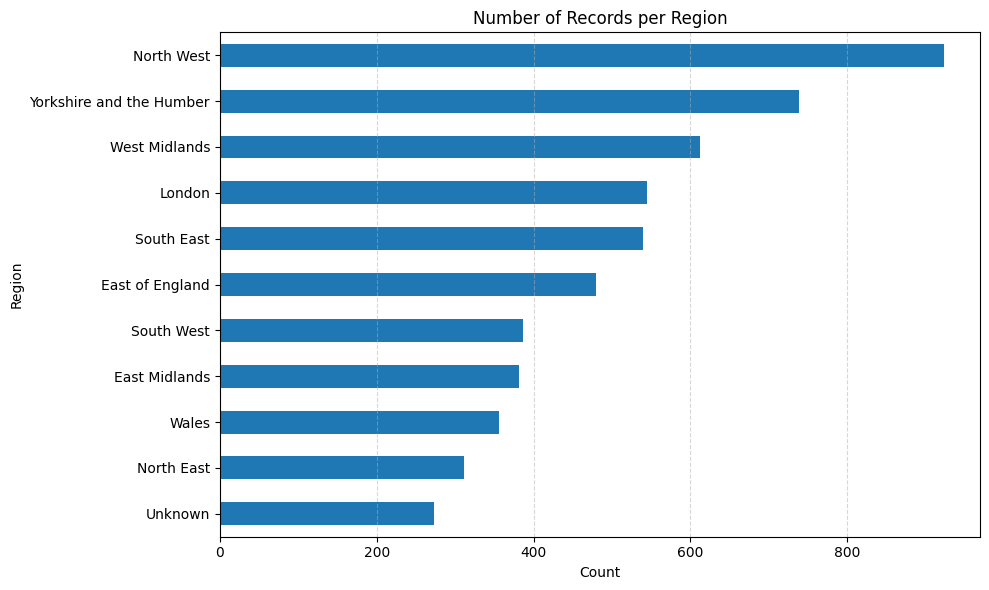

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Region count data
region_counts = pd.Series({
    'North West': 923,
    'Yorkshire and the Humber': 739,
    'West Midlands': 612,
    'London': 545,
    'South East': 539,
    'East of England': 480,
    'South West': 387,
    'East Midlands': 382,
    'Wales': 356,
    'North East': 311,
    'Unknown': 273
})

# Plot
plt.figure(figsize=(10, 6))
region_counts.sort_values().plot(kind='barh')  # horizontal bar plot
plt.title('Number of Records per Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
data.columns

Index(['Year of Breach', 'AgeGroup', 'Court_breach', 'Sex', 'ASBOs_breached',
       'AgeGroupMid', 'CourtType', 'City', 'region'],
      dtype='object')

In [ ]:
import geopandas as gpd

# Load from your Google Drive (after downloading the real .geojson file)
gdf = gpd.read_file("/content/drive/MyDrive/:content:drive:MyDrive:uk_regions.geojson")

# Filter for UK regions
gdf_uk = gdf[gdf['CNTR_CODE'] == 'UK'].copy()

# Optional mapping to readable names
nuts_to_region = {
    'UKC': 'North East',
    'UKD': 'North West',
    'UKE': 'Yorkshire and the Humber',
    'UKF': 'East Midlands',
    'UKG': 'West Midlands',
    'UKH': 'East of England',
    'UKI': 'London',
    'UKJ': 'South East',
    'UKK': 'South West',
    'UKL': 'Wales',
    'UKM': 'Scotland',
    'UKN': 'Northern Ireland'
}
gdf_uk['region'] = gdf_uk['NUTS_ID'].map(nuts_to_region)

# ✅ Save cleaned GeoJSON
gdf_uk.to_file("/content/drive/MyDrive/uk_cleaned_regions.geojson", driver="GeoJSON")


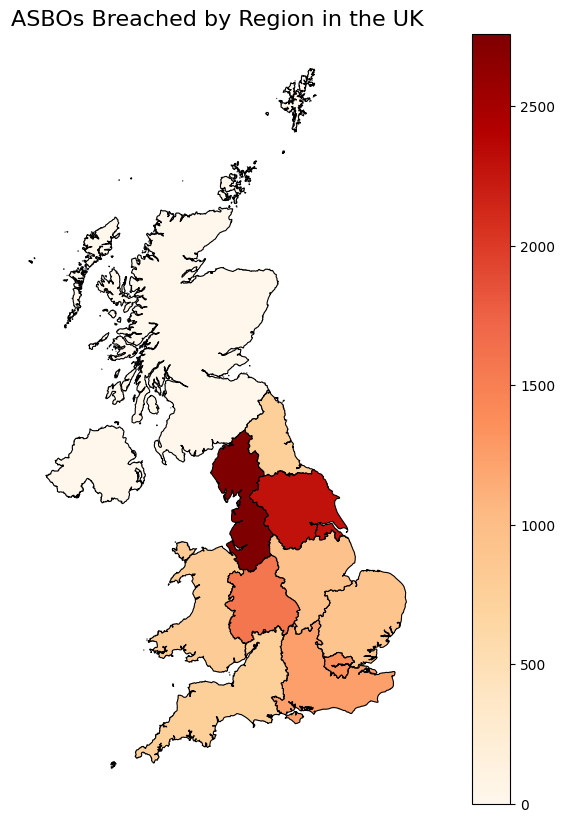

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your cleaned UK region map
gdf_uk = gpd.read_file("/content/drive/MyDrive/uk_cleaned_regions.geojson")

# Make sure your ASBO data is loaded
# Your DataFrame should be named `data` and have 'region' + 'ASBOs_breached' columns
# If not already done:
# data = pd.read_csv("your_asbo_data.csv")  # or similar

# Group and aggregate ASBOs by region
region_summary = data.groupby('region', as_index=False)['ASBOs_breached'].sum()

# Merge the ASBO data with the geospatial data
map_df = gdf_uk.merge(region_summary, on='region', how='left')
map_df['ASBOs_breached'] = map_df['ASBOs_breached'].fillna(0)

# Plot the map
fig, ax = plt.subplots(figsize=(12, 10))
map_df.plot(column='ASBOs_breached',
            cmap='OrRd',
            linewidth=0.8,
            edgecolor='black',
            legend=True,
            ax=ax)

plt.title('ASBOs Breached by Region in the UK', fontsize=16)
plt.axis('off')
plt.show()


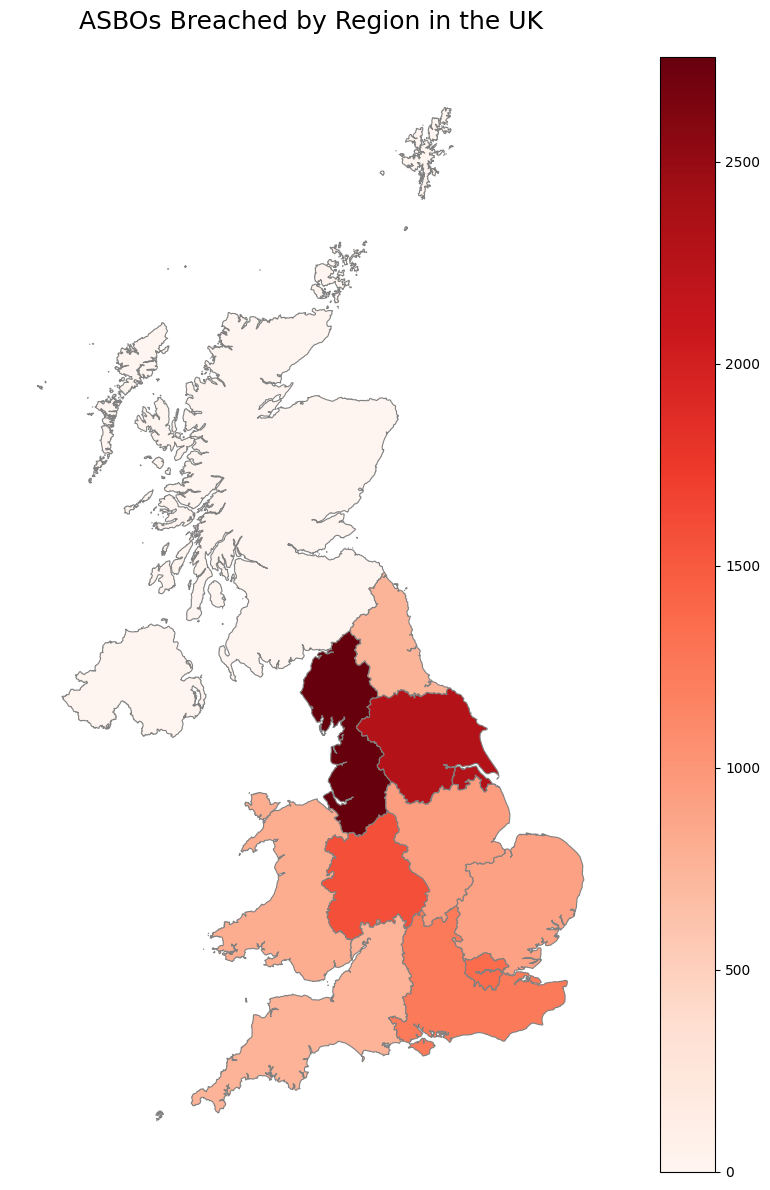

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Load UK regions GeoJSON
gdf_uk = gpd.read_file("/content/drive/MyDrive/uk_cleaned_regions.geojson")

# Aggregate ASBO breaches by region
region_summary = data.groupby('region', as_index=False)['ASBOs_breached'].sum()

# Merge with GeoDataFrame
map_df = gdf_uk.merge(region_summary, on='region', how='left')
map_df['ASBOs_breached'] = map_df['ASBOs_breached'].fillna(0)

# Set up figure
fig, ax = plt.subplots(figsize=(10, 12))

# Use quantiles for better color distribution
norm = colors.Normalize(vmin=0, vmax=map_df['ASBOs_breached'].max())

# Plot choropleth
map_df.plot(column='ASBOs_breached',
            cmap='Reds',
            linewidth=0.8,
            edgecolor='gray',
            legend=True,
            norm=norm,
            ax=ax)

# Clean title and layout
plt.title('ASBOs Breached by Region in the UK', fontsize=18, pad=20)
ax.set_axis_off()
plt.tight_layout()
plt.show()


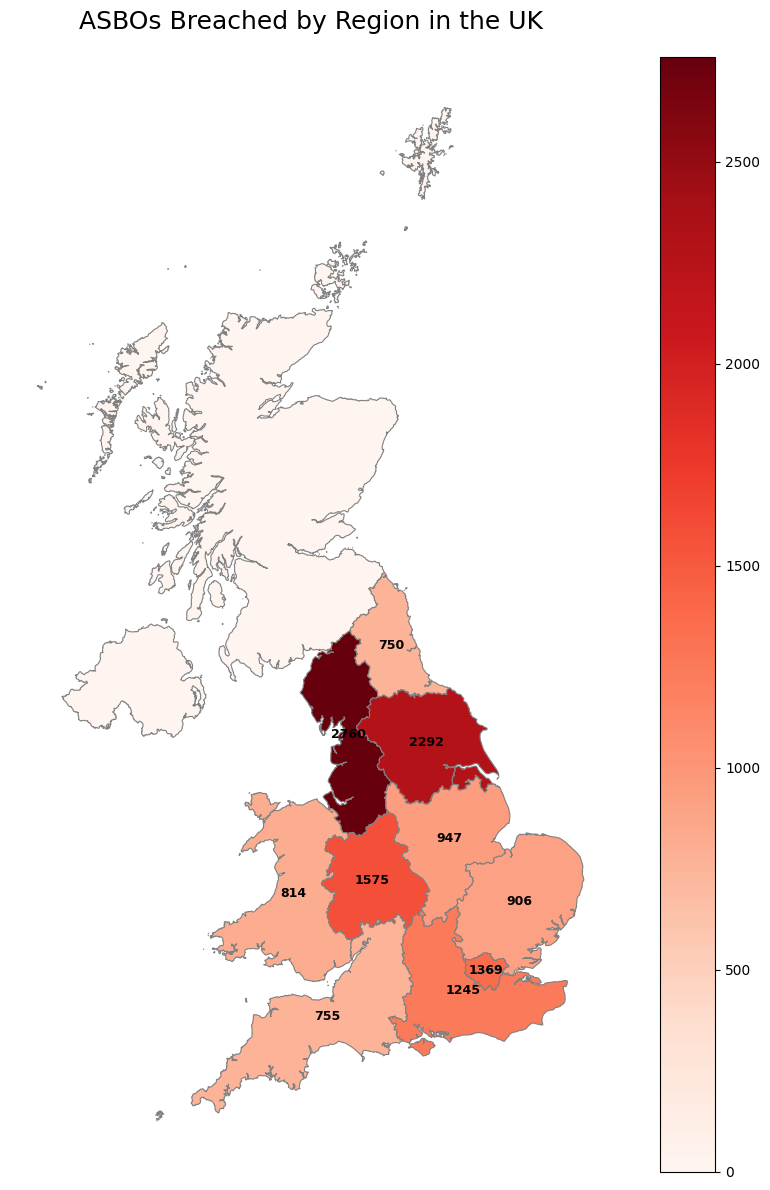

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Load UK regions GeoJSON
gdf_uk = gpd.read_file("/content/drive/MyDrive/uk_cleaned_regions.geojson")

# Aggregate ASBO breaches by region
region_summary = data.groupby('region', as_index=False)['ASBOs_breached'].sum()

# Merge with GeoDataFrame
map_df = gdf_uk.merge(region_summary, on='region', how='left')
map_df['ASBOs_breached'] = map_df['ASBOs_breached'].fillna(0)

# Set up figure
fig, ax = plt.subplots(figsize=(10, 12))

# Normalize color scale
norm = colors.Normalize(vmin=0, vmax=map_df['ASBOs_breached'].max())

# Plot choropleth
map_df.plot(column='ASBOs_breached',
            cmap='Reds',
            linewidth=0.8,
            edgecolor='gray',
            legend=True,
            norm=norm,
            ax=ax)

# Add value labels at region centroids
for idx, row in map_df.iterrows():
    if row['geometry'].is_empty or row['ASBOs_breached'] == 0:
        continue
    x, y = row['geometry'].centroid.coords[0]
    ax.text(x, y,
            f"{int(row['ASBOs_breached'])}",
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=9,
            fontweight='bold',
            color='black')

# Clean up title and layout
plt.title('ASBOs Breached by Region in the UK', fontsize=18, pad=20)
ax.set_axis_off()
plt.tight_layout()
plt.show()


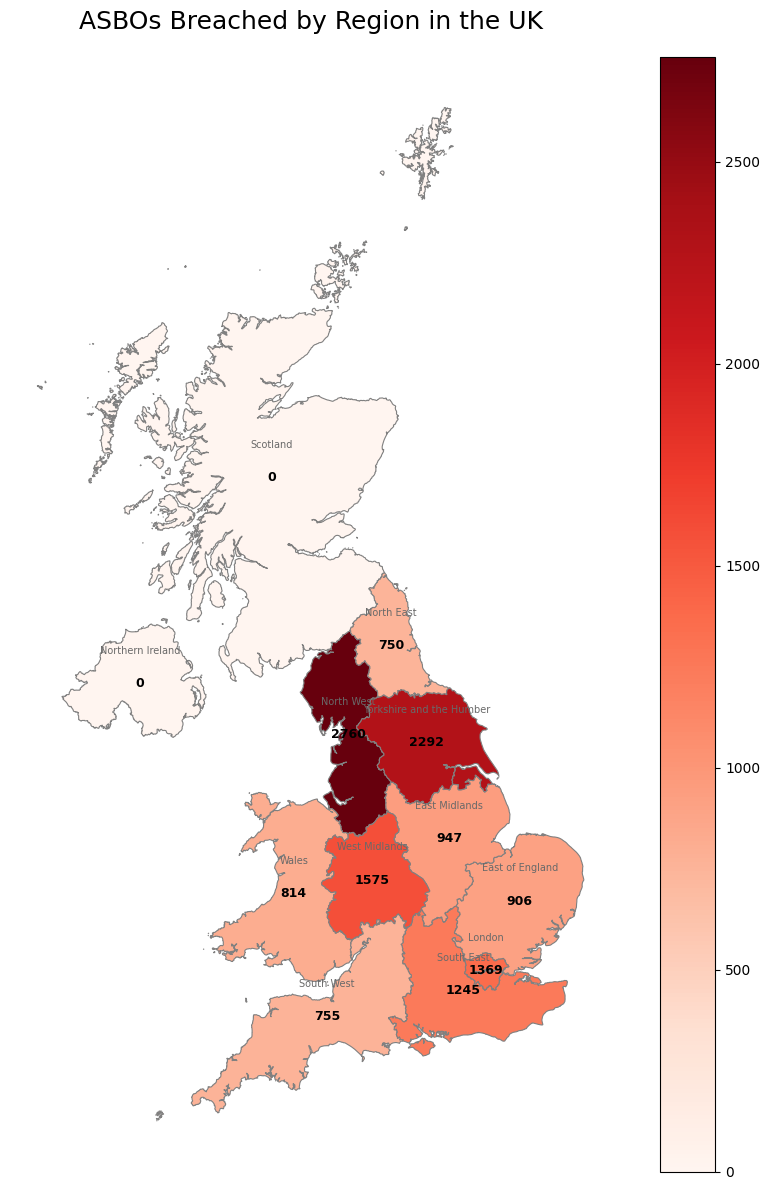

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Load UK regions GeoJSON
gdf_uk = gpd.read_file("/content/drive/MyDrive/uk_cleaned_regions.geojson")

# Aggregate ASBO breaches by region
region_summary = data.groupby('region', as_index=False)['ASBOs_breached'].sum()

# Merge with GeoDataFrame
map_df = gdf_uk.merge(region_summary, on='region', how='left')
map_df['ASBOs_breached'] = map_df['ASBOs_breached'].fillna(0)

# Set up figure
fig, ax = plt.subplots(figsize=(10, 12))

# Normalize color scale
norm = colors.Normalize(vmin=0, vmax=map_df['ASBOs_breached'].max())

# Plot choropleth
map_df.plot(column='ASBOs_breached',
            cmap='Reds',
            linewidth=0.8,
            edgecolor='gray',
            legend=True,
            norm=norm,
            ax=ax)

# Annotate value + region name at centroids
for idx, row in map_df.iterrows():
    if row['geometry'].is_empty:
        continue
    centroid = row['geometry'].centroid
    x, y = centroid.x, centroid.y

    # Label: ASBOs breached value
    ax.text(x, y,
            f"{int(row['ASBOs_breached'])}",
            ha='center', va='center',
            fontsize=9,
            fontweight='bold',
            color='black')

    # Offset label for region name
    ax.text(x, y + 0.3,
            row['region'],
            ha='center', va='bottom',
            fontsize=7,
            color='dimgray')

# Final cleanup
plt.title('ASBOs Breached by Region in the UK', fontsize=18, pad=20)
ax.set_axis_off()
plt.tight_layout()
plt.show()


#Gradient Boosting Regressor

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
features = ['Year of Breach', 'Sex', 'AgeGroupMid', 'CourtType', 'City', 'region']
target = 'ASBOs_breached'

# Extract features and target
X = data[features].copy()
y = data[target].copy()

# Reduce cardinality in 'City' by grouping rare ones as 'Other'
min_freq = 10
city_counts = X['City'].value_counts()
cities_to_keep = city_counts[city_counts >= min_freq].index
X['City'] = X['City'].apply(lambda x: x if x in cities_to_keep else 'Other')

# Optional: cap extreme outliers in y to reduce noise
q_low, q_high = y.quantile(0.01), y.quantile(0.99)
y = y.clip(q_low, q_high)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert object-type columns to categorical
categorical_cols = X.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = pd.Categorical(X_test[col], categories=X_train[col].cat.categories)

# Train model
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred):.4f}")


Test MSE: 3.4510
Test R²: 0.5302


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# ------------------------
# Load and prepare data
# ------------------------

# Define features and target
features = ['Year of Breach', 'Sex', 'AgeGroupMid', 'CourtType', 'City', 'region']
target = 'ASBOs_breached'

X = data[features].copy()
y = data[target].copy()

# Reduce cardinality in 'City'
min_freq = 10
city_counts = X['City'].value_counts()
X['City'] = X['City'].apply(lambda x: x if x in city_counts[city_counts >= min_freq] else 'Other')

# Cap outliers in target
q_low, q_high = y.quantile([0.01, 0.99])
y = y.clip(q_low, q_high)

# Optional: log-transform the target
log_transform = True
if log_transform:
    y = np.log1p(y)

# ------------------------
# Train-test split
# ------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------
# Encode categoricals for HGB
# ------------------------

categorical_cols = X.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = pd.Categorical(X_test[col], categories=X_train[col].cat.categories)

# ------------------------
# Hyperparameter tuning
# ------------------------

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_iter': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [10, 20, 50]
}

base_model = HistGradientBoostingRegressor(random_state=42)

grid = GridSearchCV(base_model, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

# ------------------------
# Predict and evaluate
# ------------------------

y_pred = best_model.predict(X_test)

# If log-transformed, reverse it
if log_transform:
    y_pred = np.expm1(y_pred)
    y_test = np.expm1(y_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print(f"Test MSE: {mse:.4f}")
print(f"Test R²: {r2:.4f}")


Best Parameters: {'learning_rate': 0.05, 'max_depth': 10, 'max_iter': 200, 'min_samples_leaf': 10}
Test MSE: 3.3847
Test R²: 0.5392


#Add Year of Breach × AgeGroupMid as a new feature

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
features = ['Year of Breach', 'Sex', 'AgeGroupMid', 'CourtType', 'City', 'region']
target = 'ASBOs_breached'

# Extract features and target
X = data[features].copy()
y = data[target].copy()

# Add interaction term (product of two numerical variables)
X['Year_Age_Interaction'] = X['Year of Breach'] * X['AgeGroupMid']

# Reduce cardinality in 'City' by grouping rare ones as 'Other'
min_freq = 10
city_counts = X['City'].value_counts()
cities_to_keep = city_counts[city_counts >= min_freq].index
X['City'] = X['City'].apply(lambda x: x if x in cities_to_keep else 'Other')

# Optional: cap extreme outliers in y to reduce noise
q_low, q_high = y.quantile(0.01), y.quantile(0.99)
y = y.clip(q_low, q_high)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert object-type columns to categorical
categorical_cols = X.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = pd.Categorical(X_test[col], categories=X_train[col].cat.categories)

# Train Gradient Boosting model
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred):.4f}")


Test MSE: 3.4396
Test R²: 0.5317


#Add Multiple Pairwise Features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Define features and target
features = ['Year of Breach', 'Sex', 'AgeGroupMid', 'CourtType', 'City', 'region']
target = 'ASBOs_breached'

# Extract features and target
X = data[features].copy()
y = data[target].copy()

# Reduce cardinality in 'City' by grouping rare ones as 'Other'
min_freq = 10
city_counts = X['City'].value_counts()
cities_to_keep = city_counts[city_counts >= min_freq].index
X['City'] = X['City'].apply(lambda x: x if x in cities_to_keep else 'Other')

# Create interaction features between numerical variables
num_cols = ['Year of Breach', 'AgeGroupMid']
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X[num_cols])
poly_feature_names = poly.get_feature_names_out(num_cols)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names, index=X.index)

# Concatenate interaction features with rest of X
X = pd.concat([X.drop(columns=num_cols), X_poly_df], axis=1)

# Optional: clip extreme outliers in y
q_low, q_high = y.quantile(0.01), y.quantile(0.99)
y = y.clip(q_low, q_high)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert object-type columns to categorical
categorical_cols = X.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = pd.Categorical(X_test[col], categories=X_train[col].cat.categories)

# Train model
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred):.4f}")


Test MSE: 3.4396
Test R²: 0.5317


#Random Search for Gradient Boosting Regressor

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

# Define features and target
features = ['Year of Breach', 'Sex', 'AgeGroupMid', 'CourtType', 'City', 'region']
target = 'ASBOs_breached'

X = data[features].copy()
y = data[target]

# Reduce cardinality of 'City' by grouping rare cities as 'Other'
city_counts = X['City'].value_counts()
min_freq = 10
cities_to_keep = city_counts[city_counts >= min_freq].index
X['City'] = X['City'].apply(lambda x: x if x in cities_to_keep else 'Other')

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocess categorical variables with ordinal encoding (works with HistGradientBoosting)
categorical_cols = X.select_dtypes(include='object').columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols)
    ],
    remainder='passthrough'
)

# Define model pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', HistGradientBoostingRegressor(random_state=42))
])

# Define hyperparameter space for random search
param_dist = {
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__max_iter': [100, 200, 300],
    'model__max_depth': [3, 5, 7, None],
    'model__min_samples_leaf': [10, 20, 30],
    'model__l2_regularization': [0.0, 0.1, 1.0, 10.0]
}

# Randomized search
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

# Evaluate on test data
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Best Params: {search.best_params_}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred):.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'model__min_samples_leaf': 10, 'model__max_iter': 200, 'model__max_depth': None, 'model__learning_rate': 0.1, 'model__l2_regularization': 10.0}
Test MSE: 6.5069
Test R²: 0.4929


#Grid Search CV

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
features = ['Year of Breach', 'Sex', 'AgeGroupMid', 'CourtType', 'City', 'region']
target = 'ASBOs_breached'

# Extract features and target
X = data[features].copy()
y = data[target].copy()

# Reduce cardinality in 'City' by grouping rare ones as 'Other'
min_freq = 10
city_counts = X['City'].value_counts()
cities_to_keep = city_counts[city_counts >= min_freq].index
X['City'] = X['City'].apply(lambda x: x if x in cities_to_keep else 'Other')

# Optional: cap extreme outliers in y
q_low, q_high = y.quantile(0.01), y.quantile(0.99)
y = y.clip(q_low, q_high)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert object-type columns to categorical
categorical_cols = X.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = pd.Categorical(X_test[col], categories=X_train[col].cat.categories)

# Define model and parameter grid
model = HistGradientBoostingRegressor(random_state=42)
param_grid = {
    'max_iter': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'l2_regularization': [0, 1.0]
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
print("Best parameters:", grid.best_params_)

# Predict and evaluate
y_pred = best_model.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred):.4f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'l2_regularization': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 100}
Test MSE: 3.4810
Test R²: 0.5261


#Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder

# Define features and target
features = ['Year of Breach', 'Sex', 'AgeGroupMid', 'CourtType', 'City', 'region']
target = 'ASBOs_breached'

# Extract features and target
X = data[features].copy()
y = data[target].copy()

# Reduce cardinality in 'City' by grouping rare ones as 'Other'
min_freq = 10
city_counts = X['City'].value_counts()
cities_to_keep = city_counts[city_counts >= min_freq].index
X['City'] = X['City'].apply(lambda x: x if x in cities_to_keep else 'Other')

# Optional: cap extreme outliers in y to reduce noise
q_low, q_high = y.quantile(0.01), y.quantile(0.99)
y = y.clip(q_low, q_high)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Encode categorical variables with ordinal encoding
categorical_cols = X.select_dtypes(include='object').columns.tolist()
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train[categorical_cols] = encoder.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = encoder.transform(X_test[categorical_cols])

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred):.4f}")


Test MSE: 4.6266
Test R²: 0.3701


#Neural Network

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# --- Prepare data ---
target = 'ASBOs_breached'
feature_cols = ['Year of Breach', 'Sex', 'AgeGroupMid', 'CourtType', 'City', 'region']
X = data[feature_cols]
y = data[target].clip(upper=data[target].quantile(0.99))  # Clip outliers

categorical_cols = ['AgeGroupMid', 'CourtType', 'Sex', 'City', 'region']
numeric_cols = ['Year of Breach']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

y_train_np = y_train.values.astype(np.float32)
y_test_np = y_test.values.astype(np.float32)

X_train_tensor = torch.tensor(X_train_processed.toarray() if hasattr(X_train_processed, "toarray") else X_train_processed,
                              dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_processed.toarray() if hasattr(X_test_processed, "toarray") else X_test_processed,
                             dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np).view(-1, 1)
y_test_tensor = torch.tensor(y_test_np).view(-1, 1)

train_ds = TensorDataset(X_train_tensor, y_train_tensor)
test_ds = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=64)

# --- Define improved model ---
class RegressionNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        return self.net(x)

model = RegressionNN(X_train_tensor.shape[1])

# --- Loss, optimizer, and scheduler ---
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',
                                                       factor=0.5, patience=10,
                                                       verbose=True)

# --- Training loop with early stopping ---
epochs = 300
best_loss = float('inf')
patience, wait = 20, 0
for epoch in range(epochs):
    model.train()
    running_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
        optimizer.step()
        running_loss += loss.item() * xb.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)

    # Scheduler step
    scheduler.step(epoch_loss)

    # Early stopping
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        best_model = model.state_dict()
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{epochs} Loss: {epoch_loss:.4f}")

# Load best model
model.load_state_dict(best_model)

# --- Evaluation ---
model.eval()
with torch.no_grad():
    preds_test = model(X_test_tensor).view(-1)
    mse = criterion(preds_test, y_test_tensor.view(-1))
    ss_tot = torch.sum((y_test_tensor.view(-1) - torch.mean(y_test_tensor.view(-1)))**2)
    ss_res = torch.sum((y_test_tensor.view(-1) - preds_test)**2)
    r2 = 1 - ss_res / ss_tot

print(f"Test MSE: {mse.item():.4f}")
print(f"Test R²: {r2.item():.4f}")


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/300 Loss: 6.1654
Epoch 10/300 Loss: 3.3936
Epoch 20/300 Loss: 3.1760
Epoch 30/300 Loss: 2.6831
Epoch 40/300 Loss: 2.6737
Epoch 50/300 Loss: 2.4910
Epoch 60/300 Loss: 2.5632
Epoch 70/300 Loss: 2.1135
Epoch 80/300 Loss: 2.0743
Epoch 90/300 Loss: 1.9531
Epoch 100/300 Loss: 1.9390
Epoch 110/300 Loss: 1.8789
Epoch 120/300 Loss: 1.8729
Epoch 130/300 Loss: 1.5700
Epoch 140/300 Loss: 1.5584
Epoch 150/300 Loss: 1.6997
Epoch 160/300 Loss: 1.4056
Epoch 170/300 Loss: 1.4215
Epoch 180/300 Loss: 1.3408
Epoch 190/300 Loss: 1.3177
Epoch 200/300 Loss: 1.2788
Epoch 210/300 Loss: 1.2603
Epoch 220/300 Loss: 1.2905
Epoch 230/300 Loss: 1.3793
Epoch 240/300 Loss: 1.4113
Epoch 250/300 Loss: 1.1931
Epoch 260/300 Loss: 1.2712
Epoch 270/300 Loss: 1.3965
Epoch 280/300 Loss: 1.2248
Early stopping at epoch 282
Test MSE: 3.8254
Test R²: 0.4792


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Define the improved neural network model
class ImprovedRegressionNN(nn.Module):
    def __init__(self, input_dim, layers=[128, 64, 32], dropout_rate=0.3):
        super().__init__()
        self.layers = nn.ModuleList()
        self.bns = nn.ModuleList()
        self.dropouts = nn.ModuleList()

        prev_dim = input_dim
        for layer_size in layers:
            self.layers.append(nn.Linear(prev_dim, layer_size))
            self.bns.append(nn.BatchNorm1d(layer_size))
            self.dropouts.append(nn.Dropout(dropout_rate))
            prev_dim = layer_size

        self.out = nn.Linear(prev_dim, 1)

    def forward(self, x):
        for linear, bn, drop in zip(self.layers, self.bns, self.dropouts):
            x = F.relu(bn(linear(x)))
            x = drop(x)
        return self.out(x)

# Hyperparameters
learning_rates = [0.001, 0.0005]
batch_sizes = [32, 64]
layer_configs = [
    [128, 64, 32],
    [256, 128, 64, 32]
]
dropout_rate = 0.3
epochs = 50

# Prepare datasets
train_ds = TensorDataset(X_train_tensor, y_train_tensor)
test_ds = TensorDataset(X_test_tensor, y_test_tensor)

best_r2 = -float('inf')
best_model = None

for lr in learning_rates:
    for batch_size in batch_sizes:
        for layers in layer_configs:
            print(f"Training with lr={lr}, batch_size={batch_size}, layers={layers}")

            model = ImprovedRegressionNN(X_train_tensor.shape[1], layers=layers, dropout_rate=dropout_rate)
            criterion = nn.MSELoss()
            optimizer = torch.optim.Adam(model.parameters(), lr=lr)

            train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

            # Training loop
            for epoch in range(epochs):
                model.train()
                running_loss = 0.0
                for xb, yb in train_loader:
                    optimizer.zero_grad()
                    preds = model(xb)
                    loss = criterion(preds, yb)
                    loss.backward()
                    optimizer.step()
                    running_loss += loss.item() * xb.size(0)
                epoch_loss = running_loss / len(train_loader.dataset)
                if (epoch + 1) % 10 == 0 or epoch == 0:
                    print(f"Epoch {epoch+1}/{epochs} Loss: {epoch_loss:.4f}")

            # Evaluation
            model.eval()
            with torch.no_grad():
                preds_test = model(X_test_tensor).view(-1)
                mse = criterion(preds_test, y_test_tensor.view(-1))
                ss_tot = torch.sum((y_test_tensor.view(-1) - torch.mean(y_test_tensor.view(-1)))**2)
                ss_res = torch.sum((y_test_tensor.view(-1) - preds_test)**2)
                r2 = 1 - ss_res / ss_tot
            print(f"Test MSE: {mse.item():.4f}, Test R²: {r2.item():.4f}\n")

            if r2.item() > best_r2:
                best_r2 = r2.item()
                best_model = model
                print(f"New best model found with R²: {best_r2:.4f}\n")


Training with lr=0.001, batch_size=32, layers=[128, 64, 32]
Epoch 1/50 Loss: 9.6432
Epoch 10/50 Loss: 3.9491
Epoch 20/50 Loss: 3.4331
Epoch 30/50 Loss: 3.2974
Epoch 40/50 Loss: 3.2629
Epoch 50/50 Loss: 3.0314
Test MSE: 3.8705, Test R²: 0.4730

New best model found with R²: 0.4730

Training with lr=0.001, batch_size=32, layers=[256, 128, 64, 32]
Epoch 1/50 Loss: 8.9326
Epoch 10/50 Loss: 4.0402
Epoch 20/50 Loss: 3.6231
Epoch 30/50 Loss: 3.3457
Epoch 40/50 Loss: 3.0577
Epoch 50/50 Loss: 2.9841
Test MSE: 3.8202, Test R²: 0.4799

New best model found with R²: 0.4799

Training with lr=0.001, batch_size=64, layers=[128, 64, 32]
Epoch 1/50 Loss: 10.7155
Epoch 10/50 Loss: 3.5329
Epoch 20/50 Loss: 3.2494
Epoch 30/50 Loss: 3.1162
Epoch 40/50 Loss: 2.7187
Epoch 50/50 Loss: 2.7145
Test MSE: 3.8741, Test R²: 0.4726

Training with lr=0.001, batch_size=64, layers=[256, 128, 64, 32]
Epoch 1/50 Loss: 11.8522
Epoch 10/50 Loss: 3.9316
Epoch 20/50 Loss: 3.3074
Epoch 30/50 Loss: 2.8741
Epoch 40/50 Loss: 2.9